In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_DIRECTORY = '/content/drive/MyDrive/data'

**all_values contains every observation of the radar without any filtering**

In [4]:
import glob
import os
directory = DATA_DIRECTORY
csv_files = glob.glob(os.path.join(directory, '*.csv'))
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    df.columns = [col.strip() for col in df.columns]
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True, sort=False)
combined_df = combined_df.sort_values(by = 'time')
combined_df = combined_df.reset_index()
combined_df.drop(columns = ['index','Unnamed: 0'],inplace = True)

In [5]:
combined_df['time'] = pd.to_datetime(combined_df['time'])
combined_df['time'] = pd.to_datetime(combined_df['time'])
combined_df['elevation'] = combined_df['elevation'].str.rstrip('.').astype('float')


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Z          6156 non-null   float64       
 1   time       6156 non-null   datetime64[ns]
 2   elevation  6156 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 144.4 KB


In [ ]:
specific_date = pd.Timestamp('2023-12-04')
filtered_df = combined_df[combined_df['time'].dt.date == specific_date.date()]

In [8]:
l = [1,2,3,4,5,6,7,8,9,10,11]
m = l[0:10]
m

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Only considering the 250 KM scans which are in the sets of elevations [0.2,1,2,4,6,8,10,12,16,21]**

In [9]:
df_selected = pd.DataFrame()
times = []
Z = []
selected_elevations = []
for i in range(len(combined_df) - 10):
    if combined_df['elevation'].iloc[i] == 0.2 and combined_df['elevation'].iloc[i + 9] == 21.0:
        reflectivity = combined_df['Z'].iloc[i:i + 10].tolist()
        elevations = combined_df['elevation'].iloc[i:i + 10].tolist()
        max_reflectivity = max(reflectivity)
        max_index = reflectivity.index(max_reflectivity)
        max_elevation = elevations[max_index]
        times.append(combined_df['time'].iloc[i + 9])
        Z.append(max_reflectivity)
        selected_elevations.append(max_elevation)

# Create the DataFrame from the lists
df_selected['time'] = times
df_selected['Z'] = Z
df_selected['elevation'] = selected_elevations


In [10]:
df_selected

,time,Z,elevation
0,2023-07-10 04:56:22,0.000000,1.0
1,2023-07-10 06:58:23,0.000000,0.2
2,2023-07-10 07:36:05,1.416813,16.0
3,2023-07-24 05:06:34,0.000000,0.2
4,2023-07-24 05:20:04,7.565233,9.0
...,...,...,...
453,2024-01-08 10:44:48,0.000000,0.2
454,2024-01-08 11:02:44,0.000000,0.2
455,2024-01-08 11:20:37,0.000000,0.2
456,2024-01-08 11:38:22,1.891842,12.0


In [11]:
df_selected = df_selected[df_selected['Z'] != 0] #Ignoring all zero values

In [12]:
df_selected['time'] = pd.to_datetime(df_selected['time'])

<ipython-input-12-817ed96f24b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['time'] = pd.to_datetime(df_selected['time'])


In [13]:
import pytz
df_selected['time'] = df_selected['time'].dt.tz_localize('UTC')
df_selected['time'] = df_selected['time'].dt.tz_convert('Asia/Kolkata')
df_selected['time'] = df_selected['time'].dt.tz_localize(None)

<ipython-input-13-3ecce7842bee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['time'] = df_selected['time'].dt.tz_localize('UTC')
<ipython-input-13-3ecce7842bee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['time'] = df_selected['time'].dt.tz_convert('Asia/Kolkata')
<ipython-input-13-3ecce7842bee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [14]:
df_selected = df_selected.reset_index()

In [15]:
df_selected = df_selected.sort_values(by = 'time').reset_index()

In [16]:
df_selected = df_selected.drop(columns = ['level_0','index'])

In [23]:
df_selected['rounded_time'] = (df_selected['time'] - pd.to_timedelta(5, unit='m')).round('10min')

<ipython-input-22-d9cae81ed7a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=elevation_counts.index, y=elevation_counts.values, palette="viridis")


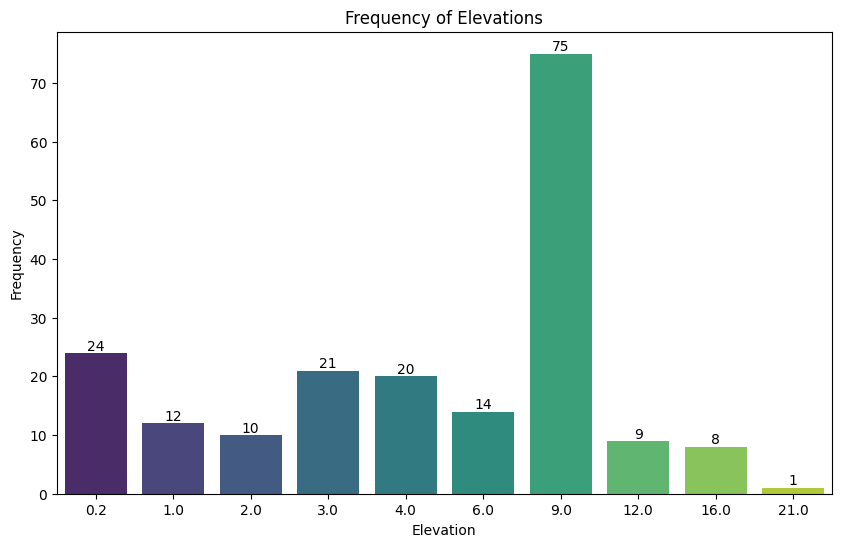

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

elevation_counts = df_selected['elevation'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=elevation_counts.index, y=elevation_counts.values, palette="viridis")
plt.title('Frequency of Elevations')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
for index, value in enumerate(elevation_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()


Moving on to y-valriable (SRI)


In [87]:
df_y = pd.read_csv('/content/drive/MyDrive/y_vals/EDA_10min_2023.csv')

In [88]:
df_y['datetime'] = pd.to_datetime(df_y['datetime'])
df_selected['rounded_time'] = pd.to_datetime(df_selected['rounded_time'])

In [49]:
df_y.head()

,Unnamed: 0,SRI,Cumulative,datetime
0,0,0.5,0.5,2023-01-02 21:40:00
1,1,2.0,2.0,2023-03-20 10:50:00
2,2,0.5,0.5,2023-05-02 02:10:00
3,3,3.5,4.0,2023-05-02 02:20:00
4,4,1.0,5.0,2023-05-02 02:30:00


In [28]:
df_selected.to_csv('/content/drive/MyDrive/x_vals/df_selected.csv') #storing our X-values

In [40]:
df_selected

,time,Z,elevation,rounded_time
0,2023-07-10 13:06:05,1.416813,16.0,2023-07-10 13:00:00
1,2023-07-24 10:50:04,7.565233,9.0,2023-07-24 10:50:00
2,2023-07-24 11:07:41,4.490189,9.0,2023-07-24 11:00:00
3,2023-07-24 16:29:26,5.091098,9.0,2023-07-24 16:20:00
4,2023-09-11 15:33:48,36.308464,0.2,2023-09-11 15:30:00
...,...,...,...,...
189,2024-01-08 14:28:16,36.014961,0.2,2024-01-08 14:20:00
190,2024-01-08 15:21:28,3.791925,12.0,2024-01-08 15:20:00
191,2024-01-08 15:39:13,16.823938,0.2,2024-01-08 15:30:00
192,2024-01-08 15:57:01,1.970154,12.0,2024-01-08 15:50:00


In [89]:
df_selected['rounded_time'] = pd.to_datetime(df_selected['rounded_time'])
df_y['datetime'] = pd.to_datetime(df_y['datetime'])

times = []
R = []
Z = []

df_selected['date'] = df_selected['rounded_time'].dt.date
df_selected['hour'] = df_selected['rounded_time'].dt.hour
df_selected['minute'] = df_selected['rounded_time'].dt.minute

df_y['date'] = df_y['datetime'].dt.date
df_y['hour'] = df_y['datetime'].dt.hour
df_y['minute'] = df_y['datetime'].dt.minute

for i in range(len(df_selected)):
    for j in range(len(df_y)):
        if (df_y['date'][j] == df_selected['date'][i] and
            df_y['hour'][j] == df_selected['hour'][i] and
            df_y['minute'][j] == df_selected['minute'][i]):
            R.append(df_y['SRI'][j])
            Z.append(df_selected['Z'][i])
            times.append(df_y['datetime'][j])

df = pd.DataFrame({
    'time': times,
    'R': R,
    'Z': Z
})


In [90]:
df['time'] = pd.to_datetime(df['time'])

In [94]:
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [95]:
df_4dec = df[df['date'] == datetime.date(2023,12,4)]

In [97]:
len(df_4dec)

42

In [99]:
# prompt: Using dataframe df: find correlation between R and Z

df_4dec['R'].corr(df_4dec['Z'])


-0.21108436977184225

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the linear relationship
m = 2  # slope
b = 5  # y-intercept

# Generate a range of values for X
X = np.linspace(0, 10, 100)  # 100 values from 0 to 10

# Calculate the corresponding Y values using the linear equation
Y = m * X + b

# Create a DataFrame from the X and Y values
df = pd.DataFrame({'X': X, 'Y': Y})

print(df['X'].corr(df['Y']))

1.0
